# Techniques de simulation et monte carlo

## Introduction

La simulation c'est: 

* se donner une loi de probabilité (ex: la loi exponentielle)
* puis inventer une technique pour simuler des v.a indépendantes $X_0,X_1,X_2,...$ suivant cette loi. 

Cela sert à:

* Calculer des intégrales: c'est la méthode de monté-carlo (on expliquera). 
* Reproduire des phénomènes naturelles
* Creer des situations "générique" pour initialiser des algorithme (notamment les algo de deep-learning)
* Des techniques avancées de simulation permettent même de résoudre des E.D.P. 

Les techniques de simulations sont nombreuses, nous présentons ici les plus simples: les lois que nous choisirons seront des lois usuelles sur $\mathbb R^n$. Des techniques plus sophistiquée permette de simuler des lois sur des espaces de grandes dimensions.

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Lois discrètes

On veut tirer des entiers aléatoires pouvant prendre les valeurs `0,1,2,3` avec comme probabilité respectives `0.2,0.1,0.5,0.2`. On utilise la technique intuitive: on considère l'intervalle continu `[0,1]` que l'on partage en 4 segments de longeurs  `0.2,0.1,0.5,0.2`. On lance un réel aléatoire `U` dans `[0,1]` avec la fonction `random()` et l'on observe dans quel segments `U` est tombé. Pour trouver les séparations entre les intervalles, on utilise la fonction `np.cumsum()` 

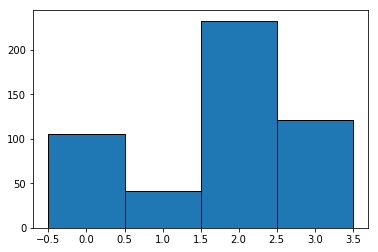

In [128]:
"""probas"""
p=[0.2,0.1,0.5,0.2]

"""on cherche dans quel intervalle tombe U"""
def simul_disc(p):
    cdf=np.cumsum(p) # sur l'exemple -> [0.2 0.3 0.8 1. ]
    U=np.random.random()
    i=0
    while U>cdf[i]:
        i+=1
    return i 

""" on simule un échantillon de nos v.a discrète"""
simus=[]
for i in range(500):
    simus.append(simul_disc(p))
"""on dresse l'histogramme"""    
bins=[-0.5,0.5,1.5,2.5,3.5]
plt.hist(simus,bins=bins,edgecolor="k");



***A vous:*** Peut-on utiliser cette technique pour tirer une loi géométrique? Si c'est possible faites-le. Supperposez votre histogramme avec la densité discrète.

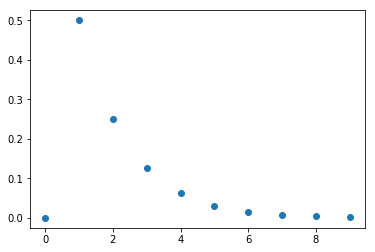

In [129]:
x=range(10)
pmf=stats.geom.pmf(x,p=0.5)# on pourrait calculer cela sans la bibliothèque stats
plt.plot(x,pmf,'o');

## Inversion d'un fonction de répartition inversible


### Théorie

Considérons un intervalle $[a,b]$. Eventuellement $a$ ou $b$ peuvent être infini. Considérons une loi $\mu$ sur cet intervalle, dont la Fonction de répartition est $F$:
$$
        \mu([a,x]) = F(x)
$$
On aimerait simuler une v.a ayant cette loi. Supposons dans un premier temps que $F$ est continue et strictement croissante sur $[a,b]$, ce qui revient à dire que  la loi $\mu$ n'a pas d'atome (=ne charge pas les singletons) et charge tout $[a,b]$. On peut dans ce cas définir l'inverse $F^{-1} :[0,1]\to [a,b]$ qui vérifie
$$
        F \circ F^{-1}(x) = F^{-1} \circ F(x) = x
$$
Mais aussi
$$
  F^{-1} (u) \leq x \quad \Leftrightarrow  \quad  u \leq F(x)
$$
 Prenons   $U$ une v.a de loi uniforme sur $[0,1]$ et définissons $X := F^{-1} (U)$. On a:
$$
       \mathbf P[X \leq x] = \mathbf P[ F^{-1} (U) \leq  x] = \mathbf P[U \leq F(x)] = F(x)
$$
Ceci étant vrai pour tout $x$, la v.a $X$ a bien pour loi $\mu$. 

### Exemple: loi exponentielle

Utilisons la technique de l'inversion de la fonction de répartition pour simuler des v.a de loi Exponentielle(scale = $\mu$). 
 
***A vous:*** Vérifiez sur papier que le programme suivant utilise bien l'inverse de la fonction de répartition de la loi exponentielle (ou peut-être ce n'est pas vraiment le cas). 

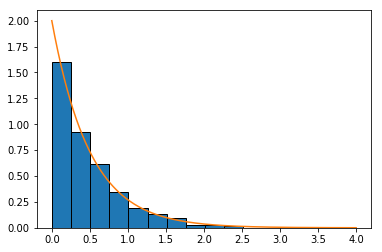

In [137]:
U=np.random.random(size=1000)
mu=0.5
X=-mu*np.log(U)
plt.hist(X,density=True,edgecolor="k")

x=np.linspace(0,4,200)
plt.plot(x,np.exp(-x/mu)/mu);

### Exemple: Weibull

Appliquez la technique de l'inversion de la fonction de répartition pour simuler des v.a de loi Weibull, dont la  fonction de répartition est donnée par
$$
    F(x) =  1 - e^{- x ^ \alpha}
$$
où $\alpha>0$ est un paramètre "de forme". Dressez l'histogramme de vos simulations, que vous pouvez superposer avec la densité théorique que vous calculerez à la main. 

Vous pouvez aussi comparez vos simus avec celles de `numpy`:

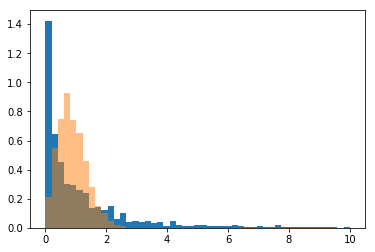

In [131]:
X1=np.random.weibull(0.7,size=2000)
X3=np.random.weibull(2,size=2000)
bins=np.linspace(0,10,50)
plt.hist(X1,bins=bins,density=True)
plt.hist(X3,bins=bins,density=True,alpha=0.5);#ici alpha c'est la transparence

***A vous:*** remplacez `bins=bins` par `bins=50`. L'un des histogramme devient très irrégulier. Pourquoi?

***A vous:*** Habituellement, la loi de Weibull est donnée avec un second paramètre: le paramètre d'échelle (=scale). Ecrivez la densité complète.   


### Parenthèse: Weibull et durée de vie résiduelle

La loi Weilbull est une généralisation de la loi exponentielles. Notons $X$ la durée de vie d'un animal, que nous modélisons par une v.a de loi exponentielle. L'animal en question a la propriété de ne pas vieillir (détaillez le calcul):
$$
        \mathbf P[X >s+t / X > t  ]   =\mathbf  P[X>s]     \qquad         (*)
$$
Par exemple :  quand l'animal a 10 ans, la probabilité qu'il vive 5 années supplémentaires
est égale  à la probabilité de dépasser les 5 ans après sa naissance. Par ailleurs, pour toute variable aléatoire positive, on a
$$
          \mathbf   E[Y]=\int_0^\infty \mathbf  P[Y>x] dx
$$
(essayez de le démontrer, cela se fait en un coup de Fubbini). Ainsi la propriété de non vieillissement donne :
$$
      \mathbf  E[X-t / X>t] =\mathbf  E[X]        \qquad                    (* *)
$$
On dit que l'espérence de vie "résiduelle" est la même à tout âge.


Maintenant, quand $X$ suit une loi de Weilbull,  que deviennent les égalités $(*)$ et $(* *)$ ?
Ces lois sont souvent utilisées pour modéliser des durées de vie (mais la vie de qui, de quoi ?).

Aide :
différenciez les cas $\alpha<1$ et $\alpha>1$.
Vous pouvez utiliser les mots clefs  :

* sous additif : $f(a+b)\leq f(a)+f(b)$
* sur additif :  $f(a+b)  \geq f(a)+f(b)$


## Inversion d'un fonction de répartition non-inversible


## inverse généralisé

La méthode "par inversion de la fonction de répartition" fonctionne aussi quand $F$ n'est pas bijective.
Personnellement, je défini alors $F^{-1}$ graphiquement, par symétrie, comme dans le graphique ci-dessous. 

* supposons que $F$ soit définit sur $[A,B]$ (et à valeur dans $[0,1]$ of course) alors $F^{-1}$ va de $[0,1]$ dans $[A,B]$
* les sauts de $F$ deviennent des plateaux de $F^{-1}$ et vis et versa. 
* pour définir précisément la valeur $F^{-1}(x)$ quand $x$ est un saut, il faut décider si on cette valeur en haut ou en bas du saut. Ce choix arbitraire n'a aucune importance pour nos simulations. 

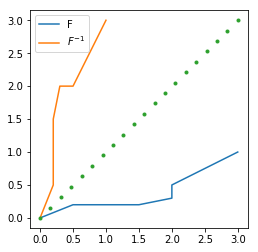

In [53]:
"""une fonction de répartition d'une loi portée par [0,3]"""
x=np.array([0,0.5,1.5,2,2,3])
y=np.array([0,2,2,3,5,10])/10

plt.plot(x,y,label="F")
plt.plot(y,x,label=r"$F^{-1}$")
plt.gca().set_aspect("equal")
plt.plot(np.linspace(0,3,20),np.linspace(0,3,20),".")
plt.legend();

Cette inverse généralisé n'est plus vraiment un inverse, mais il vérifie toujours:
$$
  F^{-1} (u) \leq x \quad \Leftrightarrow  \quad  u \leq F(x)
$$
Et c'est bien là l'essentiel, n'est-ce pas?


***Remarque:***  On définit proprement l'inverse généralisée comme ceci :
$$
        F^{-1} (u) = \inf \{y : F(y)>u\}
$$

***Exo:*** voyez-vous un lien entre la méthode de simulation des v.a discrètes du début
et la méthode de inversion de la fonction de répartition? Voyez-vous un lien entre l'algorithme du début et la formule ci-dessus? 

### Application

***Exo:*** écrivez une formule pour l'inverse généralisé de  
$$
F(x)=\frac 1 2   \big( x 1_{[0,1[} + 1_{[1,2[} + (x-1) 1_{[2,3[} + 2*1_{[3,\infty[} \big)
$$
Simulez la loi dont la fonction de répartition est $F$.

*Aide:* Voici comment on peut définir une fonction continue par morceaux, d'abord simplement, puis en se creusant la tête pour éviter les boucles. Si vous ne vous sentez pas très alèze, utiliser la première technique. 

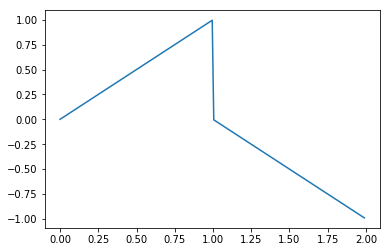

In [48]:
""" l'argument de f doit être un scalaire """
def f(x):
    if x<1 : 
        return x
    if 1<=x<2 : 
        return 1-x

xs=np.linspace(0,2,200)
ys=[]
for x in xs :
    ys.append(f(x))
plt.plot(xs,ys);

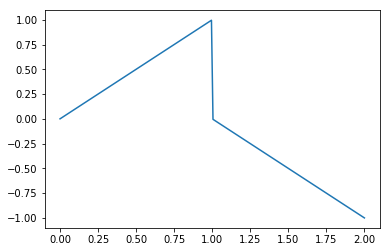

In [14]:
"""l'argument de f_np peut-être un tenseur numpy. 
Cela va plus vite car on calcule plein de valeurs d'un coup"""
def f_np(x):
    return np.where(x<1,x,1-x)
    
xs=np.linspace(0,2,200)
plt.plot(xs,f_np(xs));

## Rejet

### Densité bornée sur un intervale borné. 


Considérons par exemple la densité d'une loi béta (à une constante prèt):

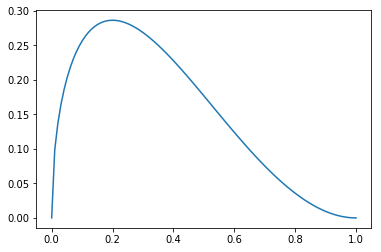

In [117]:
def f(x):
    return x**0.5*(1-x)**2

x=np.linspace(0,1,100)
plt.plot(x,f(x));    


Cette fonction est définie sur $[0,1]$ et à valeurs dans $[0,0.3]$. Lançons successivement des points aléatoires $(U_i,V_i)$ uniformément dans le rectangle $[0,1]\times [0,0.3]$. Arrétons les lancés  dès qu'un point  tombe en-dessous de la courbe. Clairement, on n'a plus de chance de s'arrèter là ou la courbe est haute. Notons $(U_I,V_I)$ le point où l'on c'est arrété.

Que pensez-vous de la loi de $U_I$? Si vous n'avez pas la réponse immdiatement, peut-être pouriez-vous simplement comparer les probabilités:
$$
\mathbf P[0<U_I<0.2] \qquad \text{et} \qquad \mathbf P[0.8<U_I<1] 
$$
Peut-être même pouriez-vous m'indiquer comment calculer le rapport entre ces deux probabilités? 

Et plus généralement, vous pouriez dire que la probabilité $\mathbf P[a<U_I<b]$ est proportionnelle à... Donc la loi de $U_I$ est... 

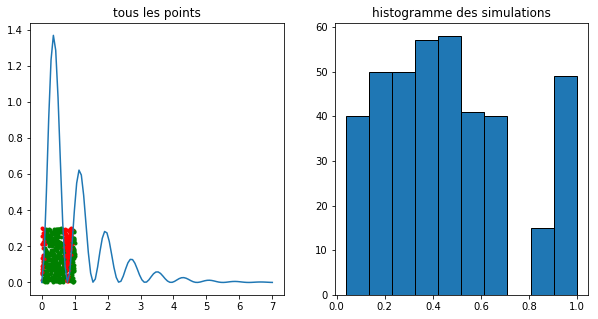

In [141]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(10,5)

def rejet():
    while True:
        U=np.random.uniform(0,1)
        V=np.random.uniform(0,0.3)
        if V<f(U):
            ax[0].plot(U,V,".",c="g")
            return U
        else: 
            ax[0].plot(U,V,".",c="r")
        
        
simus=[]
for i in range(400):
    simus.append(rejet())
ax[0].plot(x,f(x));    
ax[1].hist(simus,edgecolor="k")
ax[0].set_title("tous les points")
ax[1].set_title("histogramme des simulations");

Voici la preuve formelle du résultat que vous avez intuiter. Comprenez-là, elle est très instructives. 


Considérons $f$ une fonction positive, portée par $[A,B]$ et majorée par $M$. Imaginons que $f$ est proportionnelle à une densité qui nous intéresse. Considérons $(U_i,V_i)$ des v.a i.i.d uniformes sur $[A,B]\times[0,M]$, notons $I = \min\{i: V_i \leq f(U_i) \}$. Calculons la loi de $U_I$. Considérons pour cela $\phi$ une fonction teste. Dans le calcul suivant, on notera $cst$ une quantité qui ne dépend pas de $\phi$: 
$$
\begin{align}
\mathbf E[\phi(U_I)] &= \sum_i \mathbf E[\phi(U_i), i=I] \\
&=\sum_i \mathbf E[\phi(U_i), V_i\leq f(U_i), V_{i-1}>f(U_{i-1}),...,V_0>f(U_0)] \\
&= cst \ \mathbf E[\phi(U_0), V_0\leq f(U_0)]\\
&= cst \ \mathbf E[\phi(U_0), V_0\leq f(U_0)]\\
&= cst \ \int_A^B \int_0^M \phi(u) 1_{\{v \leq f(u)\}} \,  dv \, du  \\
&= cst \ \int  \phi(u) f(u) \, du  
\end{align}
$$
En particulier avec $\phi=1$ on découvre que
$
1 = cst \int f
$
et par conséquence:
$$
\mathbf E[\phi(U_I)]  = \int  \phi(u) \frac{\ f(u) \ }{\int f} \, du
$$
Conclusion: $U_I$ a comme densité $\frac{\ f(u) \ }{\int f}$.

Remarques: 

* Pour utiliser cette méthode de rejet, on n'a besoin de connaitre la densité qu'à une constante multiplicative prét (et cela a son utilité dans certaines applications en grande dimension). D'ailleurs on voit dans la preuve que $f$ est naturellement renormalisée.
* Retenez l'astuce de la constante (on peut s'en passer mais les calculs sont vraiment plus long).
* Renetez la manière dont a réussi à remplacer $I = \min\{i: V_i \leq f(U_i) \}$ par une expression toute simple. 
* Dans la preuve, savez-vous où l'on utilise le fait que $f$ est portée par $[A,B]$ et majorée par $M$?
* Pourquoi faut-il trouver un 'bon' majorant $M$?


### Vectorisation du rejet

On peut assez facilement vectorisez les techniques de rejets. L'incovénient c'est qu'on ne sait pas à l'avance combien on va obtenir de v.a:

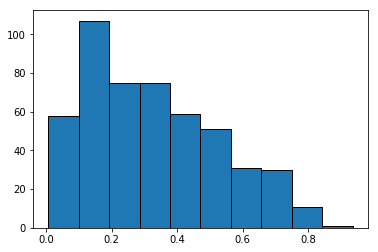

In [122]:
def rejet_np(nb):
    U=np.random.uniform(0,1,size=nb)
    V=np.random.uniform(0,0.3,size=nb)
    return U[V<f(U)]

simus=rejet_np(1000)
plt.hist(simus,edgecolor="k");

***A vous:*** Trouvez une astuce pour faire une fonction qui renvoie un nombre de simulations donné, et qui utilise la vectorisation. 

### Densité perturbée


Supposons que l'on veuille simuler des v.a dont la densité est proportionnelle à: 
$$
 f(x)= e^{-x} \, \big(1-\cos(8 x) \big) 1_{\mathbb R_+}
$$
Cette densité n'est pas à support compact, on ne peux donc pas utiliser la technique précédent. Mais on remarque que  $f(x)\,dx$ peut être vu comme une perturbation de la loi exponentielle: une loi que je sais facilement simuler! 

* Observez le programme suivant et déduisez la technique
* Cette technique peut-elle être employée pour des densités non bornées? Si oui, inventez un exemple. 
* Ecrivez la preuve qui justifie cette technique (en vous inspirant d'une preuve précédente). 

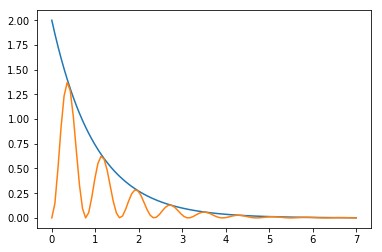

In [139]:
""" on décompose f en un produit de deux termes. """
""" g est proportionnelle à la loi exponentielle """
def g(x):
    return np.exp(-x)*2
""" h est à valeur dans [0,1], c'est une perturbation"""
def h(x):
    return (1-np.cos(8*x))/2

def f(x):
    return g(x)*h(x)

x=np.linspace(0,7,100)
plt.plot(x,g(x))
plt.plot(x,f(x));

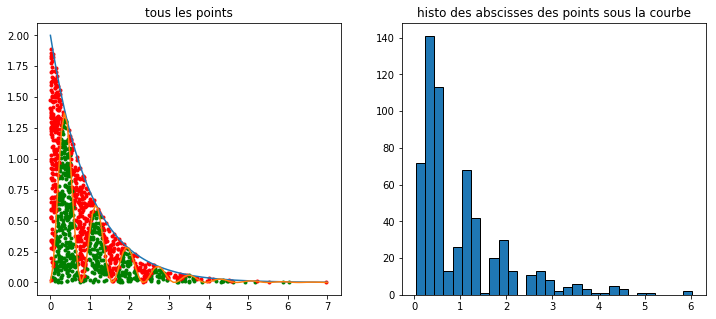

In [140]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(12,5)

def rejet2():
    while True:
        U=-np.log(np.random.random())
        V=np.random.uniform(0,g(U))
        if V<f(U):
            ax[0].plot(U,V,".",c="g")
            return U
        else: 
            ax[0].plot(U,V,".",c="r")
    
        
simus=[]
for i in range(600):
    simus.append(rejet2())
ax[0].plot(x,g(x))
ax[0].plot(x,g(x)*h(x));
ax[1].hist(simus,bins=30,edgecolor="k")
ax[0].set_title("tous les points")
ax[1].set_title("histogramme des simulations");

### Rejet géométrique

On veut maintenant simuler des v.a uniforme dans un domaine de $\mathbb R^2$ un peu tordu (un oeil).  

* la première fonction définie le domaine. 
* La technique du rejet est ici très intuitive.  
* Applications: 
    * Calculez approximativement l'aire de cet oeil. 
    * Calculez approximativement le barycentre de cet oeil. Pas desoin de faire de long calcul, utiliser les simulations pour cela. 

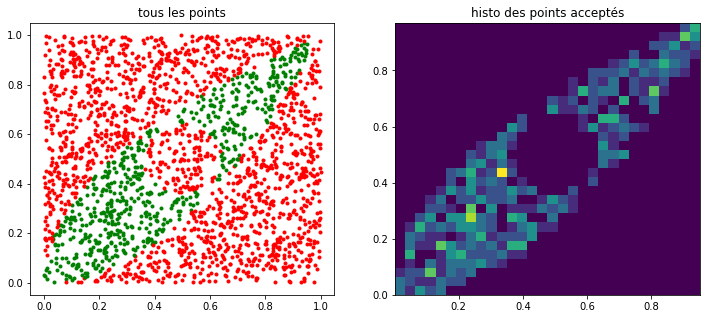

In [113]:
""" renvoie True si (x,y) est dans le domaine."""
def in_domain(x,y):
    if 0<x<np.sqrt(y) and x>y**2 and 0<y<1 and (x-0.5)**2+(y-0.5)**2>0.02: 
        return True
    else:
        return False

    
fig,ax=plt.subplots(1,2)
fig.set_size_inches(12,5)


def rejet3():
    while True:
        X=np.random.uniform(0,1)
        Y=np.random.uniform(0,1)
        if in_domain(X,Y):
            ax[0].plot(X,Y,".",c="g")
            return X,Y
        else: 
            ax[0].plot(X,Y,".",c="r")

        
Xs=[]
Ys=[]
for i in range(600):
    X,Y=rejet3()
    Xs.append(X)
    Ys.append(Y)

ax[1].hist2d(Xs,Ys,bins=[30,30])
ax[0].set_title("points acceptés et rejetés")
ax[1].set_title("histo des points acceptés");
    

### Mélangeons les techniques. 

Simulez des v.a sur $\mathbb R^2$ dont la densité est proportionnelle à: 
$$
  f(x,y) =  1_{\{x^2+y^2<1\}} (1+\sin(x*y))
$$

## Box-muller

### Principe

Nous allons maintenant introduire la technique de Box-Muller permettant de simuler des v.a gaussiennes (Pourquoi n'utilise-t-on pas l'une des techniques précédentes?). Nous procédons par "analyse" et "synthèse".

***Notations:*** Si $(x,y)$ est un point de $\mathbb R^2$, on note $r(x,y) = \sqrt{x^2+y^2}$ et $\theta(x,y)$ ses coordonnées polaires. 

***Analyse:*** On considère $(X,Y)$ un couple de gaussiennes indépendantes. Calculons la loi de $R=r(X,Y)$ et $\Theta=\theta(X,Y)$: considérons $\phi$ une fonction teste, on a:
$$
    \mathbb E[ \phi( R ,\Theta)  ]   =  cst   \int \int     \phi\big( r(x,y),\theta(x,y)\big)  e^{-\frac 12 (x^2+y^2 ) }\, dx dy 
$$
On fait le changement en coordonnée polaire:
$(r(x,y),\theta(x,y))  \to (r,\theta)$, donc $(dx\,dy)\to \dots$ (à connaître par coeur sous peine de devoir calculer un Jacobien). Les domaines d'intégration se transforment ainsi:
$
\mathbb  R \times  \mathbb  R  \to  \mathbb  R_+ \times [0,2 \pi]
$.
Ainsi
$$
 \mathbb  E[ \phi( R ,\Theta)  ]   =  cst ...
$$
On en déduit que $R$ et $\Theta$ sont indépendants, de densité... et du coup $R^2$ suit une loi exponentielle de paramètre...  


***Synthèse:*** Pour simuler un couple de v.a gaussiennes indépendantes, on simule $R^2 \sim \text{Expo}(scale=\dots)$ et  $\Theta \sim \text{Unif}[0,2 \pi]$, et on considére le point de coordonnées polaires  $(\sqrt E, \Theta)$. 

En pratique, on prend $U$ et $V$ deux v.a de loi $\text{Unif}[0,1]$ et on considère
$\sqrt{ 2 |\ln(U)| } \cos(2 \pi V )$ et $\sqrt{ 2 |\ln(U)| } \sin(2 \pi V )$.


***A vous:*** mettez en place une fonction qui fournisse $n$ v.a gaussiennes d'un coup.  Essayez de ne pas gaspiller appels du générateur aléatoire, en utilisant la version sinus et la version cosinus. Validez en superposant l'histogramme de vos simulations avec la densité de la gaussienne.

### Parenthèse: Les coordonnées polaires en informatique

Notons qu'en `numpy` l'angle d'un point `(x,y)` se calcul avec la fonction `np.artan2(y,x)` et que dans tous les autres langages le mot clef `arctan2` apparait; mais quel est le lien avec la fonction artangente?

### Monte Carlo sur une sphère

Voici un  exo en plusieur étapes (toutes surmontables, oui!)

*Vocabulaire:* Notons $|x|$ la norme de $x$.  Une fonction $f(x)$ est invariante par rotation lorsqu'elle s'écrit $f(x)=g(|x|)$ pour une certaine fonction $g$. 

Considérez:

* une densité $f(x)$ sur $\mathbb R^n$ invariante par rotation. 
* une v.a $X$ de loi $f(x)\,dx$.
* une rotation $T$ de $\mathbb R^n$, de centre 0. 

Vérifez que $T(X)$ a aussi pour loi $f(x)dx$: Soit  $\phi$ une fonction teste; en utilisant le fait que les rotations sont inversibles, et que leur déterminant vaut...  on a:
$$
   \mathbf E[\phi(T(X))] = ... = \mathbf  E[\phi(X)]
$$


Cherchez maintenant une densité $f(x)=f(x_0,...,x_{d-1})$  qui est invariante par rotation, et qui en plus est la loi de $d$ variables indépendantes  (à une dilation prêt, il n'y a qu'un seul choix possible).


Simulez une v.a  $X=(X_0,...,X_{d-1})$  de loi $f(x)dx$. 

Trouvez une transformation du $X$ précédent qui suive une loi de loi uniforme sur $S^{d-1}$:  la
sphère unité de $\mathbb R^d$.





J'imagine que, sans probabilités, vous sauriez estimer cette intégrale pour d=2 et d=3, mais au-dela c'est difficile. Les méthodes de monte carlo sont faites pour cela: pour calculer des intégrales sur des domaines non-rectangulaire en grande dimension.

### Application: d'un point de la terre à un point de la lune


Comment peut-on estimer la distance moyenne entre la surface de la terre et la surface de la lune? Décrivez l'agorithme, et si programmez-le. Vous trouverez facilement les constantes numériques nécessaire sur wikipedia. 
